<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Resources" data-toc-modified-id="Resources-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Resources</a></span></li><li><span><a href="#setup" data-toc-modified-id="setup-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>setup</a></span></li><li><span><a href="#Import-data" data-toc-modified-id="Import-data-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Import data</a></span></li><li><span><a href="#Fix-data-issue" data-toc-modified-id="Fix-data-issue-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Fix data issue</a></span></li><li><span><a href="#Preprocessing" data-toc-modified-id="Preprocessing-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Preprocessing</a></span></li><li><span><a href="#Use-lazypredict-to-run-40-models!" data-toc-modified-id="Use-lazypredict-to-run-40-models!-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Use lazypredict to run 40 models!</a></span></li><li><span><a href="#Double-checking-results" data-toc-modified-id="Double-checking-results-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Double checking results</a></span></li></ul></div>

# Resources

Main article about lazypredict

https://towardsdatascience.com/how-to-run-40-regression-models-with-a-few-lines-of-code-5a24186de7d


More about pyforest

https://towardsdatascience.com/how-to-import-all-python-libraries-with-one-line-of-code-2b9e66a5879f

The dataset used in the example

https://www.kaggle.com/shivachandel/kc-house-data

In [1]:
# ! pip install lazypredict
# 2m to install

  Attempting uninstall: numpy
    Found existing installation: numpy 1.19.2
    Uninstalling numpy-1.19.2:
      Successfully uninstalled numpy-1.19.2
  Attempting uninstall: scipy
    Found existing installation: scipy 1.5.2
    Uninstalling scipy-1.5.2:
      Successfully uninstalled scipy-1.5.2
  Attempting uninstall: pandas
    Found existing installation: pandas 1.1.3
    Uninstalling pandas-1.1.3:
      Successfully uninstalled pandas-1.1.3
  Attempting uninstall: joblib
    Found existing installation: joblib 0.17.0
    Uninstalling joblib-0.17.0:
      Successfully uninstalled joblib-0.17.0
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 0.23.2
    Uninstalling scikit-learn-0.23.2:
      Successfully uninstalled scikit-learn-0.23.2
  Attempting uninstall: pytest
    Found existing installation: pytest 6.2.5
    Uninstalling pytest-6.2.5:
      Successfully uninstalled pytest-6.2.5
  Attempting uninstall: tqdm
    Found existing installation: t

In [4]:
# ! pip install pyforest
# 7secs to install

  Created wheel for pyforest: filename=pyforest-1.1.0-py2.py3-none-any.whl size=14609 sha256=61d7c6f5a07ec6e5271a11fea9b9ad7c56b65f3fe96de38deb53cdb2917e81d4
  Stored in directory: c:\users\windows pc\appdata\local\pip\cache\wheels\21\2d\19\8b5488f0caea6d892333413745640532d40d70e6b5351d7633
Successfully built pyforest


# setup

In [5]:
# Importing important libraries
import pyforest
from lazypredict.Supervised import LazyRegressor
from pandas.plotting import scatter_matrix
# Scikit-learn packages
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn import metrics
from sklearn.metrics import mean_squared_error
# Hide warnings
import warnings
warnings.filterwarnings('ignore')
# Setting up max columns displayed to 100
pd.options.display.max_columns = 100

C:\Users\public\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:143: FutureWarning: The sklearn.utils.testing module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.utils. Anything that cannot be imported from sklearn.utils is now part of the private API.
  warnings.warn(message, FutureWarning)


<IPython.core.display.Javascript object>

# Import data

In [33]:
# Import dataset
df = pd.read_csv('data/kc_house_data_train.csv', index_col=[0,1])
df.head()

<IPython.core.display.Javascript object>

,,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
id,date,,,,,,,,,,,,,,,,,,,
7129300520,20141013T000000,221900.00,3,1.00,1180,5650,1.00,0,0,3,7,1180.00,0,1955,0,98178,47.51,-122.26,1340,5650
6414100192,20141209T000000,538000.00,3,2.25,2570,7242,2.00,0,0,3,7,2170.00,400,1951,1991,98125,47.72,-122.32,1690,7639
5631500400,20150225T000000,180000.00,2,1.00,770,10000,1.00,0,0,3,6,770.00,0,1933,0,98028,47.74,-122.23,2720,8062
2487200875,20141209T000000,604000.00,4,3.00,1960,5000,1.00,0,0,5,7,1050.00,910,1965,0,98136,47.52,-122.39,1360,5000
1954400510,20150218T000000,510000.00,3,2.00,1680,8080,1.00,0,0,3,8,1680.00,0,1987,0,98074,47.62,-122.05,1800,7503


In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 21613 entries, (7129300520, '20141013T000000') to (1523300157, '20141015T000000')
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          21613 non-null  float64
 1   bedrooms       21613 non-null  int64  
 2   bathrooms      21613 non-null  float64
 3   sqft_living    21613 non-null  int64  
 4   sqft_lot       21613 non-null  int64  
 5   floors         21613 non-null  float64
 6   waterfront     21613 non-null  int64  
 7   view           21613 non-null  int64  
 8   condition      21613 non-null  int64  
 9   grade          21613 non-null  int64  
 10  sqft_above     21611 non-null  float64
 11  sqft_basement  21613 non-null  int64  
 12  yr_built       21613 non-null  int64  
 13  yr_renovated   21613 non-null  int64  
 14  zipcode        21613 non-null  int64  
 15  lat            21613 non-null  float64
 16  long           21613 non-null  float64

# Fix data issue

In [35]:
df['bedrooms'].value_counts()

3     9824
4     6882
2     2760
5     1601
6      272
1      199
7       38
8       13
0       13
9        6
10       3
11       1
33       1
Name: bedrooms, dtype: int64

In [36]:
# Fixing house with 33 bedrooms
df[df['bedrooms'] == 33] =3
df['bedrooms'].value_counts()
# This will add 1 bathroom to houses without any bathroom
df['bathrooms'] = df.bedrooms.apply(lambda x: 1 if x < 1 else x)

# Preprocessing

In [37]:
# Removing nan and infinite values
df.replace([np.inf, -np.inf], np.nan, inplace=True)
df.dropna(inplace=True)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 21611 entries, (7129300520, '20141013T000000') to (1523300157, '20141015T000000')
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          21611 non-null  float64
 1   bedrooms       21611 non-null  int64  
 2   bathrooms      21611 non-null  int64  
 3   sqft_living    21611 non-null  int64  
 4   sqft_lot       21611 non-null  int64  
 5   floors         21611 non-null  float64
 6   waterfront     21611 non-null  int64  
 7   view           21611 non-null  int64  
 8   condition      21611 non-null  int64  
 9   grade          21611 non-null  int64  
 10  sqft_above     21611 non-null  float64
 11  sqft_basement  21611 non-null  int64  
 12  yr_built       21611 non-null  int64  
 13  yr_renovated   21611 non-null  int64  
 14  zipcode        21611 non-null  int64  
 15  lat            21611 non-null  float64
 16  long           21611 non-null  float64

In [39]:
# Creating train test split
X = df.drop(columns=['price'])
y = df.price
# Call train_test_split on the data and capture the results
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=3,test_size=0.25)

<IPython.core.display.Javascript object>

# Use lazypredict to run 40 models!

`
Prerequisites
`

All columns in training data must be numeric

In [40]:
reg = LazyRegressor(ignore_warnings=False, custom_metric=None)
models, predictions = reg.fit(X_train, X_test, y_train, y_test)
print(models)

100%|██████████████████████████████████████████████████████████████████████████████████| 42/42 [02:22<00:00,  3.39s/it]

                               Adjusted R-Squared      R-Squared  \
Model                                                              
LGBMRegressor                                0.90           0.90   
HistGradientBoostingRegressor                0.89           0.89   
ExtraTreesRegressor                          0.88           0.88   
XGBRegressor                                 0.88           0.88   
RandomForestRegressor                        0.87           0.87   
GradientBoostingRegressor                    0.87           0.87   
BaggingRegressor                             0.86           0.86   
DecisionTreeRegressor                        0.77           0.77   
PoissonRegressor                             0.77           0.77   
KNeighborsRegressor                          0.74           0.74   
ExtraTreeRegressor                           0.70           0.70   
Lasso                                        0.69           0.69   
Ridge                                        0.6

`
Observations
`



# Double checking results

Checking the histogram based gradient boosting ensembles

https://machinelearningmastery.com/histogram-based-gradient-boosting-ensembles/

In [41]:
# Explicitly require this experimental feature
from sklearn.experimental import enable_hist_gradient_boosting
# Now you can import normally from ensemble
from sklearn.ensemble import HistGradientBoostingRegressor

In [43]:
# Evaluation Functions
def rmse(model, y_test, y_pred, X_train, y_train):
 r_squared = model.score(X_test, y_test)
 mse = mean_squared_error(y_test, y_pred)
 rmse = np.sqrt(mse)
 print('R-squared: ' + str(r_squared))
 print('Mean Squared Error: '+ str(rmse))
# Create model line scatter plot
def scatter_plot(y_test, y_pred, model_name):
    plt.figure(figsize=(10,6))
    sns.residplot(y_test, y_pred, lowess=True, color='#4682b4',
              line_kws={'lw': 2, 'color': 'r'})
    plt.title(str('Price vs Residuals for '+ model_name))
    plt.xlabel('Price',fontsize=16)
    plt.xticks(fontsize=13)
    plt.yticks(fontsize=13)
    plt.show()

In [45]:
rmse(hist, y_test, y_pred, X_train, y_train)

<IPython.core.display.Javascript object>

R-squared: 0.8987256972850323
Mean Squared Error: 111324.25465663226


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

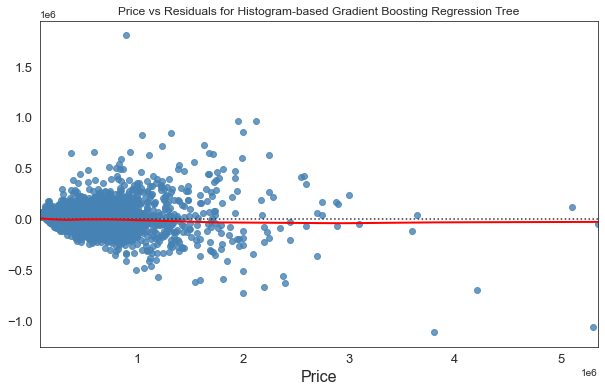

In [47]:
sns.set_style('white')
scatter_plot(y_test, y_pred, 'Histogram-based Gradient Boosting Regression Tree')